In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform, loguniform
import matplotlib.pyplot as plt
import random
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn import tree
# from google.colab import files

# MLP

**Hyperparameter Testing and Comparison**

In [ ]:
def load_and_preprocess(file_path):
    data = pd.read_csv(f'data/{file_path}')

    data = data.dropna(subset=[data.columns[0]])
    data = data.drop(columns=['Link', 'COM turn?', 'Points after move', 'Points gained'], errors='ignore')

    X = data.drop(columns=['Output'])
    y = data['Output']

    # Extracts some features. Maybe use this at some point?
    # for i,row in X.iterrows():
    #     features = [1 if row.iloc[i] == 6 - i else 0 for i in range(6)]

    #     for j,feature in enumerate(features):
    #         X.loc[i, f"feature_{j}"] = feature

    return np.array(X), y

In [332]:
X, y = load_and_preprocess("minimax_data_70_games.csv")
print(X.shape, y.shape)

(589, 20) (589,)


In [422]:
def train_and_evaluate_mlp(X, y):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the model
    model = MLPClassifier(random_state=42, max_iter=1000)

    # Define expanded hyperparameter distribution
    param_dist = {
      'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (50, 50, 50), (100, 100, 100)],
      'activation': ['tanh', 'relu', 'logistic'],
      'solver': ['adam', 'sgd'],
      'alpha': loguniform(1e-5, 1e-2),
      'learning_rate': ['constant', 'adaptive', 'invscaling'],
      'learning_rate_init': loguniform(1e-5, 1e-2),
      'max_iter': [500, 1000, 1500],
      'early_stopping': [True, False],
      'n_iter_no_change': [10, 20, 50],
      'validation_fraction': uniform(0.1, 0.2),
      'beta_1': uniform(0.8, 0.199),  # This ensures the range is [0.8, 0.999)
      'beta_2': uniform(0.9, 0.0999),  # This ensures the range is [0.9, 0.9999)
      'epsilon': loguniform(1e-9, 1e-7)
    }

    # Perform random search
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=100,
        cv=5,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(X_train, y_train)

    # Get best model
    best_model = random_search.best_estimator_

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return random_search.best_params_, random_search.best_score_, accuracy

# File paths for the datasets
file_paths = [
    # "COM And User Data (Alex).csv",
    # "COM Data (Alex).csv",
    # "User Data (Alex).csv"
    "minimax_data_70_games.csv"
    # "minimax_data_200_games.csv"
    # "allData (Alex).csv"
]

# Process each file and evaluate the MLP
for file_path in file_paths:
    print(f"\nProcessing {file_path}...")
    X, y = load_and_preprocess(file_path)
    best_params, cv_score, test_accuracy = train_and_evaluate_mlp(X, y)

    print(f"Results for {file_path}:")
    print(f"Best cross-validation score: {cv_score:.3f}")
    print("Best parameters:")
    # for param, value in best_params.items():
    #     print(f"{param}: {value}")
    print(best_params)
    print(f"Test set accuracy: {test_accuracy:.3f}")


Processing minimax_data_70_games.csv...


/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization has

Results for minimax_data_70_games.csv:
Best cross-validation score: 0.444
Best parameters:
{'activation': 'tanh', 'alpha': np.float64(5.232216089948759e-05), 'beta_1': np.float64(0.8288340795461534), 'beta_2': np.float64(0.9488963307517285), 'early_stopping': False, 'epsilon': np.float64(1.2758105177517894e-08), 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': np.float64(0.0019268985325226215), 'max_iter': 1500, 'n_iter_no_change': 10, 'solver': 'adam', 'validation_fraction': np.float64(0.26062795127597915)}
Test set accuracy: 0.381


**Decision Tree Hyperparameter Testing and Comparison**

**Optimal MLP for COM And User Data (Alex)**

In [333]:
def getModelCU(rand):
  X, y = load_and_preprocess("COM And User Data (Alex).csv")

  modelCU = MLPClassifier(
      random_state=rand,
      hidden_layer_sizes=(100, 100),
      activation='tanh',
      solver='adam',
      alpha=5.232216089948759e-05,
      learning_rate='invscaling',
      learning_rate_init=0.0019268985325226215,
      max_iter=1500,
      early_stopping=False,
      n_iter_no_change=10,
      validation_fraction=0.26062795127597915,
      beta_1=0.8288340795461534,
      beta_2=0.9488963307517285,
      epsilon=1.2758105177517894e-08
  )

  modelCU.fit(X, y)
  return modelCU


**Optimal MLP for COM Data (Alex)**

In [334]:
def getModelC(rand):
  X, y = load_and_preprocess("COM Data (Alex).csv")

  modelC = MLPClassifier(
      random_state=rand,
      hidden_layer_sizes=(50, 50, 50),
      activation='tanh',
      solver='adam',
      alpha=0.0004552971172077664,
      learning_rate='invscaling',
      learning_rate_init=6.388877641195179e-05,
      max_iter=4500,
      early_stopping=False,
      n_iter_no_change=20,
      validation_fraction=0.17893829336189446,
      beta_1=0.9138862013649969,
      beta_2=0.997935125213233,
      epsilon=3.880590213919326e-09
  )

  modelC.fit(X, y)
  return modelC


**Optimal MLP for User Data (Alex)**

In [335]:
def getModelU(rand):
  X, y = load_and_preprocess("User Data (Alex).csv")

  modelU = MLPClassifier(
      random_state=rand,
      hidden_layer_sizes=(100, 100),
      activation='tanh',
      solver='adam',
      alpha=0.007056053596739239,
      learning_rate='constant',
      learning_rate_init=0.00871159598064558,
      max_iter=500,
      early_stopping=False,
      n_iter_no_change=20,
      validation_fraction=0.14182615821570285,
      beta_1=0.8292676227048786,
      beta_2=0.9925661037536333,
      epsilon=3.450130183878664e-08
  )

  modelU.fit(X, y)
  return modelU


**Optimal MLP for Minimax Data**

In [368]:
def getModelMM70(rand):
  X, y = load_and_preprocess("minimax_data_70_games.csv")

  modelMM = MLPClassifier(
      random_state=rand,
      hidden_layer_sizes=(100,100),
      activation='relu',
      solver='sgd',
      alpha=0.0001719977407917785,
      learning_rate='adaptive',
      learning_rate_init=0.006292369268111742,
      max_iter=3000,
      early_stopping=False,
      n_iter_no_change=10,
      validation_fraction=0.13624661323313203,
      beta_1=0.8694247850420561,
      beta_2=0.9928599615103578,
      epsilon=3.1041954006175915e-08
  )

  modelMM.fit(X, y)
  return modelMM

def getModelMM200(rand):
  X, y = load_and_preprocess("minimax_data_200_games.csv")

  modelMM = MLPClassifier(
      random_state=rand,
      hidden_layer_sizes=(100,100),
      activation='relu',
      solver='sgd',
      alpha=0.0001719977407917785,
      learning_rate='adaptive',
      learning_rate_init=0.006292369268111742,
      max_iter=3000,
      early_stopping=False,
      n_iter_no_change=10,
      validation_fraction=0.13624661323313203,
      beta_1=0.8694247850420561,
      beta_2=0.9928599615103578,
      epsilon=3.1041954006175915e-08
  )

  modelMM.fit(X, y)
  return modelMM

def getModelMM3000(rand):
  X, y = load_and_preprocess("minimax_data_3000_games.csv")

  modelMM = MLPClassifier(
      random_state=rand,
      hidden_layer_sizes=(50,50,50),
      activation='relu',
      solver='sgd',
      alpha=4.335281794951564e-05,
      learning_rate='constant',
      learning_rate_init=7.476312062252303e-05,
      max_iter=1500,
      early_stopping=False,
      n_iter_no_change=50,
      validation_fraction=0.1093331326427231,
      beta_1=0.836183168474213,
      beta_2=0.9183221105343581,
      epsilon=1.6722697006183664e-08
  )

  modelMM.fit(X, y)
  return modelMM


**Optimal MLP for All Data**

In [337]:
def getModelAD(rand):
    X, y = load_and_preprocess("allData (Alex).csv")

    modelAD = MLPClassifier(
        random_state=rand,
        hidden_layer_sizes=(100,100),
        activation='tanh',
        solver='adam',
        alpha=0.0002547296385667093,
        learning_rate='constant',
        learning_rate_init=0.0004009025559400036,
        max_iter=500,
        early_stopping=False,
        n_iter_no_change=20,
        validation_fraction=0.2110863411205255,
        beta_1=0.8825490809651955,
        beta_2=0.9273133664858776,
        epsilon=1.4148751556486932e-09
    )

    modelAD.fit(X, y)
    return modelAD


# Decision Tree

**Decision Tree Hyperparameter Testing and Comparison**

In [424]:
def train_and_evaluate_dt(X, y):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the model
    model = DecisionTreeClassifier(random_state=42)

    # Define expanded hyperparameter distribution
    param_dist = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': randint(1, 75),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 20),
        'max_features': ['auto', 'sqrt', 'log2', None],
        'max_leaf_nodes': randint(10, 2000),
        'min_impurity_decrease': uniform(0.0, 0.1),
        'ccp_alpha': uniform(0.0, 0.02)
    }

    # Perform random search
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=100,
        cv=5,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(X_train, y_train)

    # Get best model
    best_model = random_search.best_estimator_

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return random_search.best_params_, random_search.best_score_, accuracy

# File paths for the datasets
file_paths = [
    "COM And User Data (Alex).csv",
    "COM Data (Alex).csv",
    "User Data (Alex).csv",
    "minimax_data_70_games.csv",
    "minimax_data_200_games.csv",
    "allData (Alex).csv"
]

# Process each file and evaluate the MLP
for file_path in file_paths:
    print(f"\nProcessing {file_path}...")
    X, y = load_and_preprocess(file_path)
    best_params, cv_score, test_accuracy = train_and_evaluate_dt(X, y)

    print(f"Results for {file_path}:")
    # print(f"Best cross-validation score: {cv_score:.3f}")
    # print("Best parameters:")
    # for param, value in best_params.items():
    #     print(f"{param}: {value}")
    # print(best_params)
    print(f"Test set accuracy: {test_accuracy:.3f}")



Processing COM And User Data (Alex).csv...
Results for COM And User Data (Alex).csv:
Test set accuracy: 0.485

Processing COM Data (Alex).csv...


/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/base.py", line 666, i

Results for COM Data (Alex).csv:
Test set accuracy: 0.441

Processing User Data (Alex).csv...
Results for User Data (Alex).csv:
Test set accuracy: 0.412

Processing minimax_data_70_games.csv...


/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
82 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/base.py", line 666, i

Results for minimax_data_70_games.csv:
Test set accuracy: 0.517

Processing minimax_data_200_games.csv...
Results for minimax_data_200_games.csv:
Test set accuracy: 0.492

Processing allData (Alex).csv...


/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
62 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/base.py", line 666, i

Results for allData (Alex).csv:
Test set accuracy: 0.436


/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/evansmith/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/base.py", line 666, i

In [414]:
def getDTModel(clf, fileName):
    X, y = load_and_preprocess(fileName)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf.fit(X, y)
    # print(clf.score(X_test, y_test))
    # print(clf.score(X_train, y_train))

    # plt.figure(figsize=(40,20))
    # tree.plot_tree(clf, filled=True, rounded=True)
    plt.show()

    return clf

**Optimal DT for COM and User Data**

In [181]:
def getDTModelCU(rand):
    clf = DecisionTreeClassifier(
        random_state=rand,
        ccp_alpha=0.018531752503229887,
        criterion='entropy',
        max_depth=17,
        max_features=None,
        max_leaf_nodes=1885,
        min_impurity_decrease=0.045913575623826135,
        min_samples_leaf=2,
        min_samples_split=7,
        splitter='best',
    )

    return getDTModel(clf, "COM And User Data (Alex).csv")

**Optimal DT for COM Data**

In [182]:
def getDTModelC(rand):
    clf = DecisionTreeClassifier(
        random_state=rand,
        ccp_alpha=0.0167696152752797,
        criterion='entropy',
        max_depth=13,
        max_features=None,
        max_leaf_nodes=179,
        min_impurity_decrease=0.03966516019542519,
        min_samples_leaf=2,
        min_samples_split=6,
        splitter='best',
    )

    return getDTModel(clf, "COM Data (Alex).csv")

**Optimal DT for User Data**

In [183]:
def getDTModelU(rand):
    clf = DecisionTreeClassifier(
        random_state=rand,
        ccp_alpha=0.018531752503229887,
        criterion='entropy',
        max_depth=17,
        max_features=None,
        max_leaf_nodes=1885,
        min_impurity_decrease=0.045913575623826135,
        min_samples_leaf=2,
        min_samples_split=7,
        splitter='best',
    )

    return getDTModel(clf, "User Data (Alex).csv")

**Optimal DT for Minimax Data**

In [ ]:
def getDTModelMM70(rand):
    clf = DecisionTreeClassifier(
        random_state=rand,
        ccp_alpha=0.0167696152752797,
        criterion='entropy',
        max_depth=13,
        max_features=None,
        max_leaf_nodes=179,
        min_impurity_decrease=0.03966516019542519,
        min_samples_leaf=2,
        min_samples_split=6,
        splitter='best',
    )

    return getDTModel(clf, "minimax_data_70_games.csv")

def getDTModelMM200(rand):
    clf = DecisionTreeClassifier(
        random_state=rand,
        ccp_alpha=0.0167696152752797,
        criterion='entropy',
        max_depth=13,
        max_features=None,
        max_leaf_nodes=179,
        min_impurity_decrease=0.03966516019542519,
        min_samples_leaf=2,
        min_samples_split=6,
        splitter='best',
    )

    return getDTModel(clf, "minimax_data_200_games.csv")

**Optimal DT for All Data**

In [ ]:
def getDTModelAD(rand):
    clf = DecisionTreeClassifier(
        random_state=rand,
        ccp_alpha=0.0167696152752797,
        criterion='entropy',
        max_depth=13,
        max_features=None,
        max_leaf_nodes=179,
        min_impurity_decrease=0.03966516019542519,
        min_samples_leaf=2,
        min_samples_split=6,
        splitter='best',
    )

    return getDTModel(clf, "allData (Alex).csv")

# Testing models

**Calculation for nominal data**

In [186]:
def make_decision(board_state, model):
    if len(board_state) != 14:
        raise ValueError("Input must be a list or array with 14 elements")

    input_data = np.array(board_state).reshape(1, -1)
    prediction = model.predict(input_data)

    return int(prediction[0])

**Manual board state entry to get ensemble recommended move**

In [369]:
def generateEnsembleForManualBoardStateEntry():
  rand = random.randint(0, 100)
  models = [(getModelCU(rand), "modelCU"),
              # (getModelC(rand), "modelC"),
              # (getModelU(rand), "modelU"),
              # (getModelMM(rand), "modelMM"),
              # (getModelAD(rand), "modelAD"),
              (getDTModelCU(rand), "modelDTCU"),
              (getDTModelC(rand), "modelDTC"),
              (getDTModelU(rand), "modelDTU"),
              (getDTModelMM(rand), "modelDTMM"),
              (getDTModelAD(rand), "modelDTAD")]
  return models

models = generateEnsembleForManualBoardStateEntry()

0.4852941176470588
0.6111111111111112
0.4117647058823529
0.7925925925925926
0.4117647058823529
0.674074074074074
0.49244712990936557
0.47165532879818595
0.4360655737704918
0.44529540481400437


In [152]:
# Given board state
new_board_state = [4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0]

# Run predictions for all model types
decisions = {}
for model in models:
    decision = make_decision(new_board_state, model[0])
    decisions[model[0]] = decision
    print(f"The predicted decision for model {model[1]} is: {decision}")

decision_counts = Counter(decisions.values())
most_common = decision_counts.most_common()

if len(most_common) > 1 and most_common[0][1] == most_common[1][1]:
    # Tie in the most common choices
    random_choice = random.randint(0, 4)
    #print(f"Random choice is: {decisions[random_choice]}")
else:
    # Output the most agreed-upon decision
    agreed_decision = most_common[0][0]
    print(f"The recommended decision is: {agreed_decision}")


The predicted decision for model modelCU is: 1
The predicted decision for model modelC is: 6
The predicted decision for model modelU is: 3
The predicted decision for model modelMM is: 1
The predicted decision for model modelAD is: 6
The predicted decision for model modelDTCU is: 3
The predicted decision for model modelDTC is: 3
The predicted decision for model modelDTU is: 5
The predicted decision for model modelDTMM is: 5
The predicted decision for model modelDTAD is: 5


**Create models**

In [468]:
# creating multiple models for each type, each with different states
# This tries to combat the issue of a model selecting an empty hole
models = [#getModelCU(42),
        #   getModelC(42),
        #   getModelU(42),
          getModelMM70(42),
          getModelMM200(42),
        #   getModelMM3000(42),
        #   getModelAD(42),
        #   getDTModelCU(42),
        #   getDTModelC(42),
        #   getDTModelU(42),
          getDTModelMM70(42),
          getDTModelMM200(42),
        #   getDTModelAD(42),
          "randomModel"]

modelNumberMappings = [
    # "MLP COM + User",
    # "MLP COM",
    # "MLP User",
    "MLP Minimax 70",
    "MLP Minimax 200",
    # "MLP Minimax 3000",
    # "MLP All Data",
    # "DT COM + User",
    # "DT COM",
    # "DT User",
    "DT Minimax 70",
    "DT Minimax 200",
    # "DT All Data",
    "Random Baseline"
    ]

**Function to save model to file for playing against in GUI**

In [154]:
def saveModel(modelNumber):
  model = models[modelNumber]
  model_filename = modelNumberMappings[modelNumber] + '.pkl'
  with open(model_filename, 'wb') as file:
      pickle.dump(model, file)
  files.download(model_filename)

# for i in range(len(models)):
#   saveModel(i)


**Game implementation from other notebook**

In [385]:
def clearConsole():
    print("\n")

# Prints the contents of the board for the player to see.
def printBoard(board):
    print(f"\n   {board[0]}\n{board[1]}\t\t     {board[3]}\n   {board[2]}\n")

def getValidMoves(board, player_num):
  board_copy = None
  if player_num == 1:
    board_copy = [row[:] for row in board]
  else:
    board_copy = flipBoard(board)
  return [i for i in range(6) if board_copy[2][i] != 0]

def isGameOver(board):
  return board[1][0] + board[3][0] == 48 or sum(board[0]) == 0 or sum(board[2]) == 0

def scoreEndGame(board):
  return (board[3][0] + sum(board[2])) - (board[1][0] + sum(board[0]))

def flipBoard(board):
  new_board = [row[:] for row in board]
  return [new_board[2][::-1], new_board[3], new_board[0][::-1], new_board[1]]

# Returns a new board and the player who's turn it is next.
def makeMove(board, move_pos, player_num):
  new_board = [row[:] for row in board]
  if player_num == 2:
    new_board = flipBoard(board)

  board_side = 2
  num_marbles = new_board[board_side][move_pos]
  new_board[board_side][move_pos] = 0

  for i in range(num_marbles):
    # Ensure that marbles do not go into the opposing player's bucket
    if board_side == 0 and move_pos == 0:
      board_side = 2
      move_pos = 0
    # Changes the board side if we reach the end of one side.
    elif (board_side != 0 and move_pos == len(board[board_side]) - 1) or (board_side == 0 and move_pos == 0):
      board_side = (board_side + 1) % 4
      move_pos = 0
      if board_side == 0:
        move_pos = 5
    # Generic change of move_pos, assuming we are staying on one side of the board.
    else:
      if board_side == 0:
        move_pos -= 1
      elif board_side == 2:
        move_pos += 1

    new_board[board_side][move_pos] += 1

  # Capture Logic - if piece lands in empty spot on your side of the board, capture pieces.
  # The website where the data was scraped uses this capturing rule
  if board_side == 2 and new_board[2][move_pos] == 1 and new_board[0][move_pos] > 0:
    new_board[3][0] += new_board[0][move_pos] + 1
    new_board[0][move_pos] = 0
    new_board[2][move_pos] = 0

  # Checks to see if player gets to go again (or if the game should end)
  next_player = None
  if not sum(new_board[0]) or not sum(new_board[2]):
    next_player = 0
  elif board_side == 1 or board_side == 3:
      next_player = player_num
  else:
    next_player = 2 if player_num == 1 else 1

  if player_num == 2:
    new_board = flipBoard(new_board)

  return new_board, next_player

def formatBoardForModels(board, player_num):
  board_copy = None
  if player_num == 1:
    board_copy = [row[:] for row in board]
  else:
    board_copy = flipBoard(board)
  return np.array(sum([board_copy[2], board_copy[3], board_copy[0][::-1], board_copy[1]], []))

In [341]:
def pickBestMove(model, board, player_num):
  valid_moves = getValidMoves(board, player_num)
  
  probabilities = model.predict_proba(formatBoardForModels(board, player_num).reshape(1, -1))[0]
  probabilitiesSorted = np.argsort(probabilities)[::-1]
  for choice in probabilitiesSorted:
    if choice in valid_moves:
      return choice

def pickRandomBestMove(model, board, player_num):
    valid_moves = getValidMoves(board, player_num)

    probabilities = model.predict_proba(formatBoardForModels(board, player_num).reshape(1, -1))[0]
    valid_move_probs = [probabilities[move] for move in valid_moves]

    valid_move_probs = np.array(valid_move_probs) ** 2
    if valid_move_probs.sum() == 0:
      return np.random.choice(valid_moves)

    valid_move_probs = valid_move_probs / valid_move_probs.sum()
    return np.random.choice(valid_moves, p=valid_move_probs)


**MODEL BATTLE!!!!**

In [484]:
def scoreGame(model1Type, model2Type):
  board = [[4,4,4,4,4,4], [0], [4,4,4,4,4,4], [0]]

  player_num = 1
  while not isGameOver(board):
    currentModelType = model1Type if player_num == 1 else model2Type
    model = models[currentModelType]
    if model == "randomModel":
      decision = random.choice(getValidMoves(board, player_num))
    else:
      decision = pickRandomBestMove(model, board, player_num)

    board, next_player = makeMove(board, decision, player_num)
    player_num = next_player

  return scoreEndGame(board)

def recordResult(model1Type, model2Type, score):
    if score > 0:
      simpleResults[model1Type] += 1
      gridResults[model1Type][model2Type] += 1
    elif score < 0:
      simpleResults[model2Type] += 1

# Format: model 1, model 1 score, model 2, model 2 score, winner
numGames = 600
numModels = len(modelNumberMappings)

gridResults = np.zeros((numModels, numModels))
simpleResults = [0] * numModels

# loop through each combination of models, excluding playing against itself
for model1Type in range(numModels):
    for model2Type in range(numModels):
        if model1Type != model2Type:
          for _ in range(numGames):
              score = scoreGame(model1Type, model2Type)
              recordResult(model1Type, model2Type, score)

print(f"{'Model':<10}{'Result'}")
print("-" * 20)
for i in range(numModels):
    print(f"{modelNumberMappings[i]:<15}     {simpleResults[i]}")

Model     Result
--------------------
MLP Minimax 70      2728
MLP Minimax 200     3343
DT Minimax 70       2329
DT Minimax 200      2059
Random Baseline     866


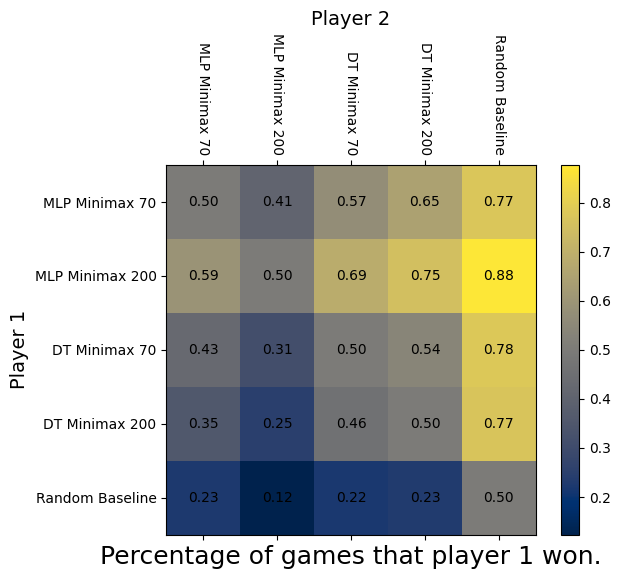

In [485]:
fig, ax = plt.subplots()
newGrid = ((gridResults / numGames) + (1 - gridResults / numGames).T) / 2
im = ax.matshow(newGrid, cmap='cividis')

for i in range(numModels):
    for j in range(numModels):
        ax.text(j, i, f'{newGrid[i, j]:.2f}', ha='center', va='center', fontsize=10)

ax.set_xticks(np.arange(numModels))
ax.set_xticklabels(modelNumberMappings)
ax.set_yticks(np.arange(numModels))
ax.set_yticklabels(modelNumberMappings)

ax.set_xlabel('Percentage of games that player 1 won.', fontsize=18)
ax.set_ylabel("Player 1", fontsize=14)
ax.set_title("Player 2", fontsize=14)

plt.colorbar(im)
plt.xticks(rotation=-90)
plt.show()

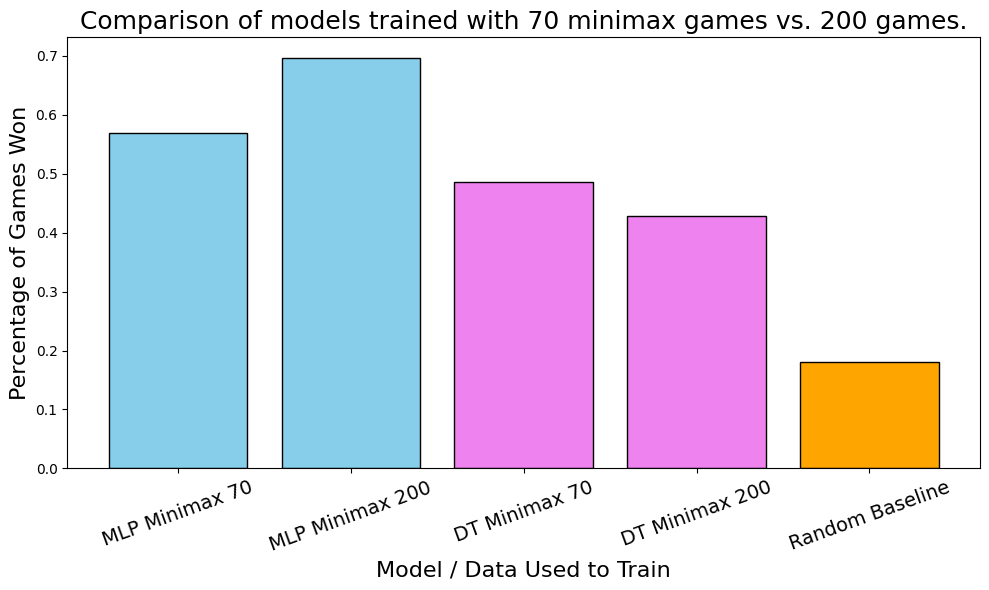

In [487]:
percentages = np.array(simpleResults) / (numGames * (len(models) - 1) * 2)# * (len(models)**2 - len(models)))

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(modelNumberMappings[0:2], percentages[0:2], color='skyblue', edgecolor='black')
plt.bar(modelNumberMappings[2:4], percentages[2:4], color='violet', edgecolor='black')
plt.bar(modelNumberMappings[4], percentages[4], color='orange', edgecolor='black')
plt.xticks(rotation=20, fontsize=14)
plt.xlabel('Model / Data Used to Train', fontsize=16)
plt.ylabel('Percentage of Games Won', fontsize=16)
plt.title('Comparison of models trained with 70 minimax games vs. 200 games.', fontsize=18)
plt.tight_layout()
plt.show()

**Play against a model of your choice**

In [160]:
def choose_move(board, modelType):
    valid_moves = [i for i in range(6) if board[i] != 0]
    for model in models[modelType]:
        move = make_decision(board, model) - 1  # Convert to 0-index
        if move in valid_moves:
            return move
    return random.choice(valid_moves)

def display_board(board):
    print("\n ", " ".join(str(board[12 - i]) for i in range(6)))
    print(f"{board[13]:>2}           {board[6]:<2}")
    print(" ", " ".join(str(board[i]) for i in range(6)), "\n")

def play_against_model(model_type):
    board = [4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0]
    is_game_over = False
    player_turn = True

    while not is_game_over:
        display_board(board)
        if player_turn:
            print("Your turn! Choose a hole (1-6):")
            move = -1
            while move not in range(1, 7) or board[move - 1] == 0:
                try:
                    move = int(input("Enter your move: "))
                except ValueError:
                    pass
                if move not in range(1, 7) or board[move - 1] == 0:
                    print("Invalid move. Please try again.")
            move -= 1  # Convert to 0-index
        else:
            print("Opponent's turn!")
            move = choose_move(board[7:] + board[:7], model_type)
            print(f"Opponent's move: {move + 1}")
            move += 7  # Adjust move back to the full board perspective

        # Make the move
        num_stones = board[move]
        board[move] = 0
        current_index = move

        extra_turn = False
        for i in range(num_stones):
            current_index = (current_index + 1) % len(board)
            if player_turn and current_index == 13:
                continue  # Skip opponent's store
            if not player_turn and current_index == 6:
                continue  # Skip player's store
            board[current_index] += 1

        # Check for extra turn or capture
        if (player_turn and current_index == 6) or (not player_turn and current_index == 13):
            print("You get another turn!" if player_turn else "Opponent gets another turn!")
            extra_turn = True
        elif player_turn and 0 <= current_index < 6 and board[current_index] == 1:
            opposite = 12 - current_index
            if board[opposite] > 0:
                board[6] += board[current_index] + board[opposite]
                board[current_index] = board[opposite] = 0
        elif not player_turn and 7 <= current_index < 13 and board[current_index] == 1:
            opposite = 12 - current_index
            if board[opposite] > 0:
                board[13] += board[current_index] + board[opposite]
                board[current_index] = board[opposite] = 0

        # Check if the game is over
        if all(stone == 0 for stone in board[:6]) or all(stone == 0 for stone in board[7:13]):
            is_game_over = True
            # Move remaining stones to respective stores
            board[6] += sum(board[:6])
            board[13] += sum(board[7:13])
            for i in range(6):
                board[i] = board[i + 7] = 0

        if not extra_turn:
            player_turn = not player_turn

    display_board(board)
    print("Game Over!")
    if board[6] > board[13]:
        print("You win!")
    elif board[13] > board[6]:
        print("Opponent wins!")
    else:
        print("It's a draw!")

# Start the game
print("Choose an opponent model: 0 = modelCU, 1 = modelC, 2 = modelU, 3 = modelMM, 4 = modelAD")
opponent_model = -1
while opponent_model not in range(5):
    try:
        opponent_model = int(input("Enter the model number: "))
    except ValueError:
        pass
    if opponent_model not in range(5):
        print("Invalid choice. Please select a number between 0 and 4.")

# Uncomment to play against model
# play_against_model(opponent_model)

Choose an opponent model: 0 = modelCU, 1 = modelC, 2 = modelU, 3 = modelMM, 4 = modelAD
Invalid choice. Please select a number between 0 and 4.


KeyboardInterrupt: Interrupted by user